# Import libraries and modules 

In [2]:
import cv2
import os
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import scipy as sp
from scipy.optimize import minimize
from matplotlib import transforms
from scipy import ndimage
import time
from numpy import asarray
from numpy import savetxt
import pickle
import h5py 
path=os.getcwd()

# Relative error evolution

<IPython.core.display.Javascript object>


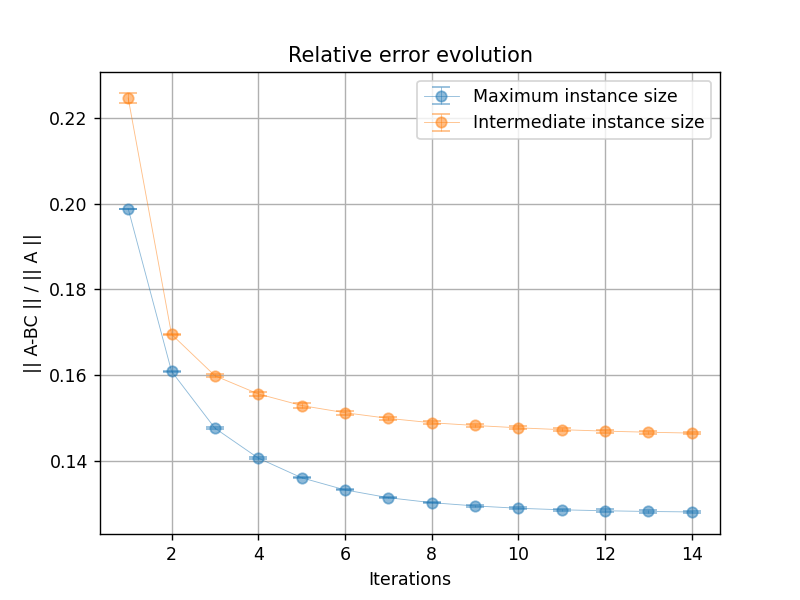

Average relative error for last iteration (maximum instance size):  0.12808729113997477
Average relative error for last iteration (intermediate instance size):  0.14647400316032216


In [4]:
iters=14

relative_errors_165= np.loadtxt('relative_errors_tot_it_14_1_165.csv', delimiter=',')
relative_errors_265= np.loadtxt('relative_errors_tot_it_14_1_265.csv', delimiter=',')
relative_errors_365= np.loadtxt('relative_errors_tot_it_14_1_365.csv', delimiter=',')
relative_errors_465= np.loadtxt('relative_errors_tot_it_14_1_465.csv', delimiter=',')
relative_errors_565= np.loadtxt('relative_errors_tot_it_14_1_565.csv', delimiter=',')

relative_errors_135= np.loadtxt('relative_errors_tot_it_14_1_135.csv', delimiter=',')
relative_errors_235= np.loadtxt('relative_errors_tot_it_14_1_235.csv', delimiter=',')
relative_errors_335= np.loadtxt('relative_errors_tot_it_14_1_335.csv', delimiter=',')
relative_errors_435= np.loadtxt('relative_errors_tot_it_14_1_435.csv', delimiter=',')
relative_errors_535= np.loadtxt('relative_errors_tot_it_14_1_535.csv', delimiter=',')


relative_errors_avg65=[0]*iters
relative_errors_std65=[0]*iters

relative_errors_avg35=[0]*iters
relative_errors_std35=[0]*iters

for i in range(iters):
    relative_errors_avg65[i]=np.average([relative_errors_165[i],relative_errors_265[i],relative_errors_365[i],relative_errors_465[i],relative_errors_565[i]])
    relative_errors_std65[i]=np.std([relative_errors_165[i],relative_errors_265[i],relative_errors_365[i],relative_errors_465[i],relative_errors_565[i]])
    relative_errors_avg35[i]=np.average([relative_errors_135[i],relative_errors_235[i],relative_errors_335[i],relative_errors_435[i],relative_errors_535[i]])
    relative_errors_std35[i]=np.std([relative_errors_135[i],relative_errors_235[i],relative_errors_335[i],relative_errors_435[i],relative_errors_535[i]])

fig, ax = plt.subplots()
ax.errorbar(list(range(1,iters+1)), relative_errors_avg65, yerr=relative_errors_std65, linewidth=0.5, fmt='-o',elinewidth=0.5,capsize=5, alpha=0.5, label='Maximum instance size')
ax.errorbar(list(range(1,iters+1)), relative_errors_avg35, yerr=relative_errors_std35, linewidth=0.5, fmt='-o',elinewidth=0.5,capsize=5,alpha=0.5, label='Intermediate instance size')

plt.legend()
ax.set(xlabel='Iterations', ylabel='|| A-BC || / || A ||', title='Relative error evolution')
ax.grid()
plt.show()
fig.savefig("Relative error evolution.png")

print("Average relative error for last iteration (maximum instance size): ",relative_errors_avg65[13])
print("Average relative error for last iteration (intermediate instance size): ",relative_errors_avg35[13])



# %Change in B

<IPython.core.display.Javascript object>


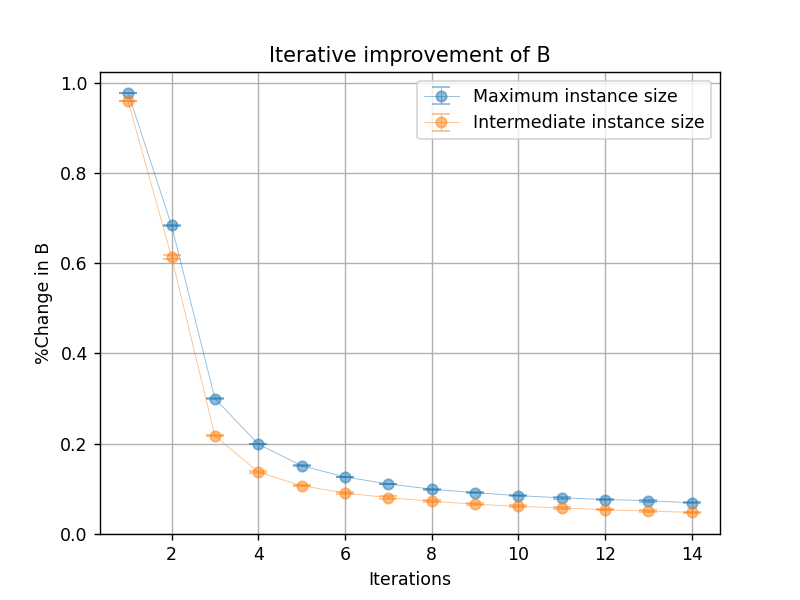

Average %Change in B for last iteration (maximum instance size):  0.0686515347380057
Average %Change in B for last iteration (intermediate instance size):  0.0474463404129367


In [5]:
iters=14
ChangeB_165= np.loadtxt('%ChangeB_tot_it_14_1_165.csv', delimiter=',')
ChangeB_265= np.loadtxt('%ChangeB_tot_it_14_1_265.csv', delimiter=',')
ChangeB_365= np.loadtxt('%ChangeB_tot_it_14_1_365.csv', delimiter=',')
ChangeB_465= np.loadtxt('%ChangeB_tot_it_14_1_465.csv', delimiter=',')
ChangeB_565= np.loadtxt('%ChangeB_tot_it_14_1_565.csv', delimiter=',')

ChangeB_135= np.loadtxt('%ChangeB_tot_it_14_1_135.csv', delimiter=',')
ChangeB_235= np.loadtxt('%ChangeB_tot_it_14_1_235.csv', delimiter=',')
ChangeB_335= np.loadtxt('%ChangeB_tot_it_14_1_335.csv', delimiter=',')
ChangeB_435= np.loadtxt('%ChangeB_tot_it_14_1_435.csv', delimiter=',')
ChangeB_535= np.loadtxt('%ChangeB_tot_it_14_1_535.csv', delimiter=',')

ChangeB_avg65=[0]*iters
ChangeB_std65=[0]*iters

ChangeB_avg35=[0]*iters
ChangeB_std35=[0]*iters

for i in range(iters):
    ChangeB_avg65[i]=np.average([ChangeB_165[i],ChangeB_265[i],ChangeB_365[i],ChangeB_465[i],ChangeB_565[i]])
    ChangeB_std65[i]=np.std([ChangeB_165[i],ChangeB_265[i],ChangeB_365[i],ChangeB_465[i],ChangeB_565[i]])
    ChangeB_avg35[i]=np.average([ChangeB_135[i],ChangeB_235[i],ChangeB_335[i],ChangeB_435[i],ChangeB_535[i]])
    ChangeB_std35[i]=np.std([ChangeB_135[i],ChangeB_235[i],ChangeB_335[i],ChangeB_435[i],ChangeB_535[i]])
    
fig, ax = plt.subplots()
ax.errorbar(list(range(1,iters+1)), ChangeB_avg65, yerr=ChangeB_std65, linewidth=0.5, fmt='-o',elinewidth=0.5,capsize=5, alpha=0.5, label='Maximum instance size')
ax.errorbar(list(range(1,iters+1)), ChangeB_avg35, yerr=ChangeB_std35, linewidth=0.5, fmt='-o',elinewidth=0.5,capsize=5, alpha=0.5, label='Intermediate instance size')

plt.legend()
ax.set(xlabel='Iterations', ylabel='%Change in B', title='Iterative improvement of B')
ax.grid()
plt.show()
fig.savefig("Iterative improvement of B.png")

print("Average %Change in B for last iteration (maximum instance size): ",ChangeB_avg65[13])
print("Average %Change in B for last iteration (intermediate instance size): ",ChangeB_avg35[13])

# %Change in C

<IPython.core.display.Javascript object>


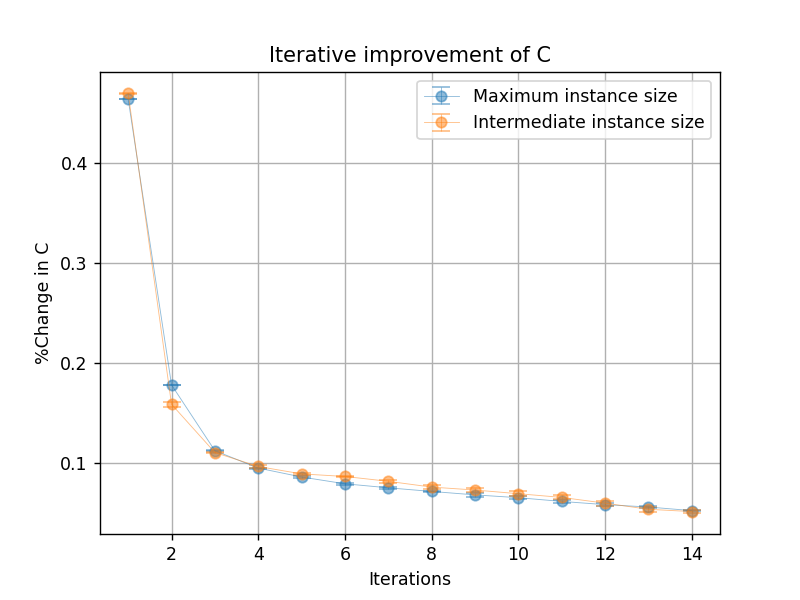

Average %Change in C for last iteration (maximum instance size):  0.05246476866073409
Average %Change in C for last iteration (intermediate instance size):  0.05150385226136565


In [6]:
iters=14
ChangeC_165= np.loadtxt('%ChangeC_tot_it_14_1_165.csv', delimiter=',')
ChangeC_265= np.loadtxt('%ChangeC_tot_it_14_1_265.csv', delimiter=',')
ChangeC_365= np.loadtxt('%ChangeC_tot_it_14_1_365.csv', delimiter=',')
ChangeC_465= np.loadtxt('%ChangeC_tot_it_14_1_465.csv', delimiter=',')
ChangeC_565= np.loadtxt('%ChangeC_tot_it_14_1_565.csv', delimiter=',')

ChangeC_135= np.loadtxt('%ChangeC_tot_it_14_1_135.csv', delimiter=',')
ChangeC_235= np.loadtxt('%ChangeC_tot_it_14_1_235.csv', delimiter=',')
ChangeC_335= np.loadtxt('%ChangeC_tot_it_14_1_335.csv', delimiter=',')
ChangeC_435= np.loadtxt('%ChangeC_tot_it_14_1_435.csv', delimiter=',')
ChangeC_535= np.loadtxt('%ChangeC_tot_it_14_1_535.csv', delimiter=',')

ChangeC_avg65=[0]*iters
ChangeC_std65=[0]*iters

ChangeC_avg35=[0]*iters
ChangeC_std35=[0]*iters

for i in range(iters):
    ChangeC_avg65[i]=np.average([ChangeC_165[i],ChangeC_265[i],ChangeC_365[i],ChangeC_465[i],ChangeC_565[i]])
    ChangeC_std65[i]=np.std([ChangeC_165[i],ChangeC_265[i],ChangeC_365[i],ChangeC_465[i],ChangeC_565[i]])
    ChangeC_avg35[i]=np.average([ChangeC_135[i],ChangeC_235[i],ChangeC_335[i],ChangeC_435[i],ChangeC_535[i]])
    ChangeC_std35[i]=np.std([ChangeC_135[i],ChangeC_235[i],ChangeC_335[i],ChangeC_435[i],ChangeC_535[i]])
    
fig, ax = plt.subplots()
ax.errorbar(list(range(1,iters+1)), ChangeC_avg65, yerr=ChangeC_std65, linewidth=0.5, fmt='-o',elinewidth=0.5, capsize=5,alpha=0.5, label='Maximum instance size')
ax.errorbar(list(range(1,iters+1)), ChangeC_avg35, yerr=ChangeC_std35, linewidth=0.5, fmt='-o',elinewidth=0.5,capsize=5, alpha=0.5, label='Intermediate instance size')

plt.legend()
ax.set(xlabel='Iterations', ylabel='%Change in C', title='Iterative improvement of C')
ax.grid()
plt.show()
fig.savefig("Iterative improvement of C.png")

print("Average %Change in C for last iteration (maximum instance size): ",ChangeC_avg65[13])
print("Average %Change in C for last iteration (intermediate instance size): ",ChangeC_avg35[13])